<a href="https://colab.research.google.com/github/CodeCraftIA/svm_classifier/blob/main/Ergasia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Αρχικά κατεβάζω την mnist έπειτα χωρίζω το dataset σε άρτιους και περιττούς αλλάζοντας την τιμή y (-1 η μία ομάδα και +1 η άλλη , απαιτείται για τον αλγόριθμο)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.svm import SVC


# load dataset
(x_train, y_train2),(x_test, y_test2) = mnist.load_data()
y_train = np.zeros(y_train2.shape, np.int16)
y_test = np.zeros(y_test2.shape, np.int16)
for i in range(60000):             #χωρίζω το dataset σε 2 ομάδες (άρτιοι και περιττοί)
  y_train[i]=2*(y_train2[i]%2)-1   # η μία ομάδα θα έχει τιμή στο y 1 και η άλλη -1

for i in range(10000):
  y_test[i]=2*(y_test2[i]%2)-1

#x_train=x_train[0:1000]
#y_train=y_train[0:1000]

# resize and normalize
input_size=784 #28*28
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


11490434/11490434 [==============================] - 0s 0us/step


**From Scratch αλγόριθμος για SVM**


γνωρίζουμε τίς σχέσεις :

w.xi - b >= 1  , για yi=1

w.xi - b <= -1  , για yi=-1

απο τις οποίες έχουμε την εξής συνθήκη :  **yi*(w.xi - b) >=1**

Επίσης έχουμε έναν regularizer λ*||w||^2 +1/n * (άθροισμα απο 1 έως n του max(0,1 - yi*(w.xi - b) ) , το δεύτερο μέρος αποτελεί το hinge loss

Άρα όταν ισχύει η συνθήκη μας ΄τοτε το cost θα είναι λ*||w||^2 , αλλιώς θα είναι λ*||w||^2 +1 - yi*(w.xi - b)

οι gradients θα είναι αντίστοιχα : 2*λ*w  και  2*λ*w - yi.xij





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.iterations = iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # αρχικοποιώ τα βάρη με τυχαίες τιμές και το b=0
        self.w = np.random.randn(n_features)*0.01
        self.b = 0

        for _ in tqdm(range(self.iterations)):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]



    def predict(self, X):
        pred = np.dot(X, self.w) - self.b
        return np.sign(pred)



In [ ]:
svm=SVM()
svm.fit(x_train,y_train)
prediction=svm.predict(x_test)
print(accuracy_score(y_test,prediction))

100%|██████████| 1000/1000 [16:18<00:00,  1.02it/s]

0.8713


In [ ]:
svm=SVM()
svm.fit(x_train,y_train)
prediction=svm.predict(x_train)
print(accuracy_score(y_train,prediction))

100%|██████████| 1000/1000 [17:07<00:00,  1.03s/it]

0.8757666666666667


accuracy **87.13%** ο απλός SVM , χωρίς kernel .

**ΣΗΜΕΙΩΣΗ**

Με λιγότερα δεδομένα που το είχα τρέξει στην αρχή (περίπου 10000) είχε καλύτερη απόδοση , περίπου 89,5% . Σε αυτό ίσως ευθύνεται το γεγόνος ότι όσο λιγότερα είναι τα δεδομένα τόσο λιγότερο απλομένα στον χώρο είναι επομένως ο απλός SVM μπορεί και βρίσκει καλή λύση , ενώ όταν τα δεδομένα αρχίζουν και απλώνονται στον χώρο τότε ο SVM δεν μπορεί να βρεί κατάλληλη ευθεία έτσι ώστε να χωρίζει το σύνολο.

**SK-learn**

Αρχικά δοκίμασα με linear kernel στον έτοιμο SVM της sklearn

In [ ]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.9062333333333333
0.9038


90.38% , όχι και τεράστια διαφορά με το δικό μου , ίσως να μπορούσα να πάρω και καλύτερα αποτελέσματα χρησιμοποιώντας καλύτερες αρχικοποιήσεις , όμώς παρατήρησα και σε αυτήν την περίπτωση το ίδιο με πρίν (δηλαδή ότι με λιγότερα δεδομένα έχει καλύτερη απόδοση , με αυτό το SVM με 10000 δεδομένα έφτασε περίπου 91,5%)

**ΣΥΜΠΕΡΑΣΜΑ**

Ίσως να μην λειτουργεί βέλτιστα στο συγκεκριμένο πρόβλημα η γραμμικότητα

Έπειτα δοκίμασα τον πολύωνυμικό kernel στον έτοιμο SVM

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='poly', gamma= 1)
svc_model.fit(x_train, y_train)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

1.0
0.9873


Πολύ απλά με C=0.1 και gamma = 1 , ο SVM έφτασε σε accuracy **98.73%**

Έπειτα δοκιμάζω τον rbf kernel

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='rbf', gamma= 1)
svc_model.fit(x_train, y_train)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.5084666666666666
0.5074


Με τις ίδιες αρχικοποιήσεις με πρίν παρατηρούμε ότι κάτι δεν πάει καλά , μόλις **50,74%**

δοκίμασα να αυξήσω και άλλο το gamma και να μειώσω το C

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.05, kernel='rbf', gamma= 2)
svc_model.fit(x_train, y_train)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.5084666666666666
0.5074


αλλά και πάλι τα αποτελέσματα παραμένουν ίδια

Επόμένως αποφάσισα να πάρω την αντίθετη κατεύθυνση μήπως αλλάξει κάτι

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.5, kernel='rbf', gamma= 0.1)
svc_model.fit(x_train, y_train)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.9985666666666667
0.9582


Παρατηρούμε πως με μικρότερο gamma (0.1) και μεγαλύτερο C (0.5) , το μοντέλο μας έφτάσε στο **96%**  με overfitting φυσικά , όμως αυτό δείχνει ότι είμαστε στον σωστό δρόμο

In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 2, kernel='rbf', gamma= 0.01)
svc_model.fit(x_train, y_train)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.9926333333333334
0.9872


Μάλιστα , φτάσαμε στο **98.72%** με αρκέτα μεγαλύτερο C (=2) και αρκετά μικρότερο gamma (=0.01)

**Πολυωνυμικός kernel , για να τον χρησιμοποιήσω στο from scratch μοντέλο μου**

In [ ]:
def polynomial_kernel(x, y, degree):
    return (np.dot(x, y) + 1) ** degree

Πειράματα με τον πολύωνυμικό kernel στο from scratch svm

Αρχικά πειραματίζομαι με μικρό δείγμα (1000 στοιχεία)

πολυωνυμικός kernel 5ου βαθμού

In [ ]:
x_train=x_train[:1000]
y_train=y_train[:1000]
K = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        K[i, j] = polynomial_kernel(x_train[i], x_train[j],5) # η ομοιότητα κάθε δείγματος με κάθε αλλο
s=SVM()
s.fit(K,y_train)

100%|██████████| 1000/1000 [00:12<00:00, 82.76it/s]


In [ ]:
test=np.zeros((10000,1000))

for i in range(10000):
  for j in range(1000):
      test[i, j] = polynomial_kernel(x_test[i], x_train[j],5)

In [ ]:
y_pred = [s.predict(x) for x in test]
print(accuracy_score(y_test,y_pred))


0.9364


Με μόλις 1000 στοιχεία στο σύνολο του training , ο svm με kernel πολυωνυμικό 5ου βαθμού δίνει accuracy σε ολόκληρο το test set **93.64%** ενώ με βαθμό 2 και 4 που δοκίμασα προηγουμένως δεν έφτασε ούτε 90%

Fit σε 20000 dataset με πολυωνυμικό kernel

In [ ]:
K = np.zeros((20000, 20000))
for i in range(20000):
    for j in range(20000):
        K[i, j] = polynomial_kernel(x_train[i], x_train[j],5)
svm=SVM()
svm.fit(K,y_train)

100%|██████████| 1000/1000 [25:43<00:00,  1.54s/it]


50 λεπτά χρειάστηκαν μόνο για να υπολογιστεί ο kernel με 20000 στοιχεία και άλλα 25 λεπτα για να γίνει το fit

In [ ]:
test=np.zeros((10000,20000))

for i in range(10000):
  for j in range(20000):
      test[i, j] = polynomial_kernel(x_test[i], x_train[j],5)

άλλα 25 λεπτά για να υπολογιστεί ο kernel του test set

In [ ]:
y_pred = [svm.predict(x) for x in K]
print(accuracy_score(y_train[:20000],y_pred))

0.81035


In [ ]:
y_pred = [svm.predict(x) for x in test]
print(accuracy_score(y_test,y_pred))

0.811


Παρατηρούμε ότι το ίδιο πρόβλημα γίνεται και με kernel , περισσότερα δεδομένα εκπαίδευσης είχαν ως αποτέλεσμα χειρότερη ακρίβεια

In [ ]:
K = np.zeros((10000, 10000))
for i in tqdm(range(10000)):
    for j in range(10000):
        K[i, j] = polynomial_kernel(x_train[i], x_train[j],2)
svm=SVM()
svm.fit(K,y_train)

100%|██████████| 1000/1000 [06:01<00:00,  2.76it/s]


In [ ]:
test=np.zeros((10000,10000))

for i in range(10000):
  for j in range(10000):
      test[i, j] = polynomial_kernel(x_test[i], x_train[j],2)

In [ ]:
y_pred = [svm.predict(x) for x in K]
print(accuracy_score(y_train[:10000],y_pred))

0.9295


In [ ]:
y_pred = [svm.predict(x) for x in test]
print(accuracy_score(y_test,y_pred))

0.9228


Τελικά ήταν καλύτερος με 2ου βαθμού πολυωνυμικό kernel 92.28% (πιθανών να συνέχιζε την άνοδο με περισσότερα δεδομένα

**Gaussian kernel** με βάση τον τύπο **k(x, x') = exp(-gamma * ||x - x'||^2)**
ώς gamma δίνω τιμή 0.01 αφού πρίν δούλεψε

In [ ]:
def gaussian_kernel(a,b,gamma=0.01):
  return np.exp(-gamma*(np.linalg.norm(a-b))**2)

Αρχικά τρέχω για μόνο 1000 δείγματα

In [ ]:
x_train=x_train[:1000]
y_train=y_train[:1000]
K = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        K[i, j] = gaussian_kernel(x_train[i], x_train[j]) # η ομοιότητα κάθε δείγματος με κάθε αλλο
s=SVM()
s.fit(K,y_train)

100%|██████████| 1000/1000 [00:16<00:00, 59.12it/s]


In [ ]:
test=np.zeros((10000,1000))

for i in range(10000):
  for j in range(1000):
      test[i, j] = gaussian_kernel(x_test[i], x_train[j])

In [ ]:
y_pred = [s.predict(x) for x in K]
print(accuracy_score(y_train[:1000],y_pred))

0.883


In [ ]:
y_pred = [s.predict(x) for x in test]
print(accuracy_score(y_test,y_pred))

0.8448


88.3% στο train και 84.48% στο test , πιθανών να έχουμε overfitting.

Δοκιμή με 20000 δείγματα

In [ ]:
K = np.zeros((20000, 20000))
for i in range(20000):
    for j in range(20000):
        K[i, j] = gaussian_kernel(x_train[i], x_train[j])
svm=SVM()
svm.fit(K,y_train)

100%|██████████| 1000/1000 [16:24<00:00,  1.02it/s]


In [ ]:
test=np.zeros((10000,20000))

for i in range(10000):
  for j in range(20000):
      test[i, j] = gaussian_kernel(x_test[i], x_train[j])

In [ ]:
y_pred = [svm.predict(x) for x in K]
print(accuracy_score(y_train[:20000],y_pred))

0.8826


In [ ]:
y_pred = [svm.predict(x) for x in test]
print(accuracy_score(y_test,y_pred))

0.8921


88.26% στο train και 89.21% στο test

In [ ]:
K = np.zeros((25000, 25000))
for i in tqdm(range(25000)):
    for j in range(25000):
        K[i, j] = gaussian_kernel(x_train[i], x_train[j])
svm=SVM()
svm.fit(K,y_train)

100%|██████████| 1000/1000 [36:26<00:00,  2.19s/it]


2 ώρες και 33 λεπτά μόνο για τον υπολογισμό του kernel

In [ ]:
test=np.zeros((10000,25000))

for i in tqdm(range(10000)):
  for j in range(25000):
      test[i, j] = gaussian_kernel(x_test[i], x_train[j])

100%|██████████| 10000/10000 [1:01:34<00:00,  2.71it/s]


In [ ]:
y_pred = [svm.predict(x) for x in K]
print(accuracy_score(y_train[:25000],y_pred))

0.78196


In [ ]:
y_pred = [svm.predict(x) for x in test]
print(accuracy_score(y_test,y_pred))

0.7831


**ΣΧΟΛΙΑ - ΓΕΝΙΚΕΣ ΠΑΡΑΤΗΡΗΣΕΙΣ**

Αρχικά έχουμε τον from scratch svm χωρίς kernel , ο οποίος τα πήγαινε καλά με λίγα δεδομένα στο train set (1000) , αλλά όσο περισσότερα έπερνα τόσο χειρότερα τα πήγαινε στο test . Έπειτα συνέχισα , δοκιμάζοντας τους έτοιμους svm για να δώ ποιός kernel τα πηγαίνει καλύτερα για να προσπαθήσω να τον δοκιμάσω στο δικό μου μοντέλο . Παρατήρησα ότι ο linear kernel έπιασε 90% αλλά ο πολυωνυμικός έφτασε το 99% κατευθείαν επομένως δεν έμεινα πολύ στον γραμμικό . Έπειτα δοκίμασα τον rbf όπου μετά απο αρκετές αποτυχυμένες αρχικοποιήσεις τελικά κατάφερα να φτάσω το 98.5% . Αυτό που παρατήρησα στον rbf kernel  ήταν ότι χρειάζοταν σχετικά μεγάλο C (>2) και αρκετά μικρότερο gamma (< 0.1) . Σε αυτό το σημείο ήταν σίγουρο πως άξιζε να χρησιμοποιήσω πολυωνυμικό αλλά και rbf kernel . Αρχικά δοκίμασα τον πολυωνυμικό σε 1000 δείγματα οι 2ου και 4ου βαθμού έφταναν μέχρι 85% ενώ ο 5ου βαθμού έφτασε 94% ! Αυτό με έκανε να πιστεύω πως θα τα πήγαινε ακόμη καλύτερα με μεγαλύτερο trainset . **ΣΗΜΕΙΩΣΗ** με οποιοδήποτε πλήθος μεγαλύτερο των 30000 στοιχείων δεν έφτανε η μνήμη . Επομένως δοκίμασα με 20000 στοιχεία όμως κατέληξα και πάλι σε χειρότερο αποτέλεσμα 81% . Επομένως ξανα έτρεξα 2ου βαθμού και πήρα 92% με 10000 στοιχεία.
Ο gaussian kernel μου με 1000 στοιχεία έφτασε 84% ενώ με 20000 89% ενώ με 25000 να έπεσε στο 78%.

Τελικό συμπέρασμα , ο πολυωνυμικός μου kernel έχει την καλύτερη συμπεριφορά , ο 5ου βαθμού φτάνει στο 94% με μόλις 1000 στοιχεία train ενώ ο 2ου βαθμού έχει ανοδική πορεία με ακρίβεια 92% με 10000 στοιχεία . Πιθανόν να έχω κάνει κάτι λάθος με τον rbf καθώς τα αποτελέσματα δεν ήταν τα αναμενώμενα .

Predictions: [ 1  1  1  1 -1 -1 -1]
Support Vectors: [[ 3. 10.]
 [ 9.  2.]
 [ 7.  1.]
 [ 2.  2.]
 [ 4. 22.]
 [10.  2.]
 [18. 22.]]
Weights: [1. 1.]
Bias: [4.6964257]


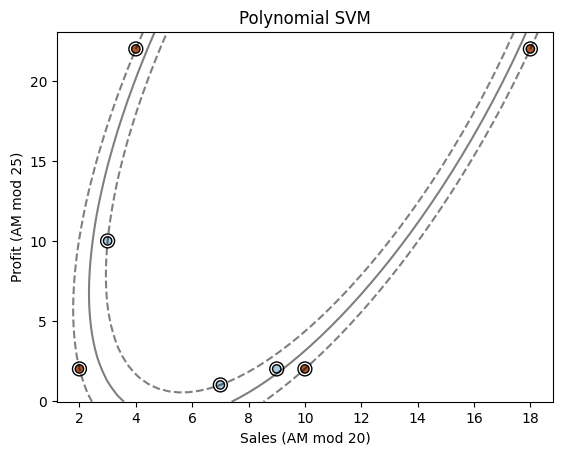

In [ ]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Δεδομένα πωλήσεων
am = 8722
sales_data = np.array([[2, am % 20],
                       [4, am % 25],
                       [10, am % 40],
                       [18, am % 50],
                       [3, am % 12],
                       [9, am % 20],
                       [7, am % 19]])

# Ομαδοποίηση σύμφωνα με το (AM mod 4) + 1
labels = np.array([1, 1, 1, 1, -1, -1, -1])

# Δημιουργία μοντέλου πολυωνυμικού SVM
poly_svm = SVC(kernel='poly', degree=2, coef0=1, gamma=1)

# Προσαρμογή του μοντέλου στα δεδομένα
poly_svm.fit(sales_data, labels)

# Προβλέψεις για τα ίδια δεδομένα
predictions = poly_svm.predict(sales_data)

# Εκτύπωση των προβλέψεων
print("Predictions:", predictions)

# Εκτύπωση του ακριβούς μοντέλου SVM
print("Support Vectors:", poly_svm.support_vectors_)
print("Weights:", poly_svm.class_weight_)
print("Bias:", poly_svm.intercept_)

# Απεικόνιση των δεδομένων και των διαχωριστικών επιφανειών
plt.scatter(sales_data[:, 0], sales_data[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k')

# Δημιουργία πλέγματος για την απεικόνιση του διαχωριστικού υπερεπιπέδου
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Δημιουργία πλέγματος σημείων για τον υπολογισμό των προβλέψεων
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = poly_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Εμφάνιση των διαχωριστικών επιφανειών και των περιθωρίων
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(poly_svm.support_vectors_[:, 0], poly_svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title('Polynomial SVM')
plt.xlabel('Sales (AM mod 20)')
plt.ylabel('Profit (AM mod 25)')
plt.show()


Scratch

scratch 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.iterations = iterations
        self.w = None
        self.b = None

    def transform_poly(self, X, Y):
        return (np.dot(X, Y.T) + 1) ** 2

    def fit(self, X, y):
        X = self.transform_poly(X,X)
        n_samples, n_features = X.shape

        # αρχικοποιώ τα βάρη με τυχαίες τιμές και το b=0
        self.w = np.random.randn(n_features)*0.01
        self.b = 0

        for _ in tqdm(range(self.iterations)):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(self.w, x_i) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]
    def predict(self, X):
        X = self.transform_poly(X,X)
        pred = np.dot(X, self.w) - self.b
        return np.sign(pred)

# Ορίζουμε τα δεδομένα και τις ετικέτες
am = 8722
sales_data = np.array([[2, am % 20],
                       [4, am % 25],
                       [10, am % 40],
                       [18, am % 50],
                       [3, am % 12],
                       [9, am % 20],
                       [7, am % 19]])

labels = np.array([1, 1, 1, 1, -1, -1, -1])

# Δημιουργία και εκπαίδευση του μοντέλου
svm = SVM()
svm.fit(sales_data, labels)

# Προβλέψεις για τα ίδια δεδομένα
predictions = svm.predict(sales_data)
print("Predictions:", predictions)


100%|██████████| 1000/1000 [00:00<00:00, 2919.54it/s]

Predictions: [1. 1. 1. 1. 1. 1. 1.]


test

In [ ]:
import numpy as np

class SVM:

    def __init__(self, C=1.0, kernel=None):
        self.C = C
        self.w = 0
        self.b = 0
        self.kernel = kernel

    def transform_poly(self, X, Y=None):
      X = (np.dot(X, X.T) + 1) ** 2
      if Y.size != 0:
            Y = Y.to_numpy()
            return X, Y
      else:
            return X
      '''
        X['x1^2'] = X['x1'] ** 2
        X['x2^2'] = X['x2'] ** 2
        X['x1 * x2'] = X['x1'] * X['x2']
        X = X.to_numpy()
        if Y.size != 0:
            Y = Y.to_numpy()
            return X, Y
        else:
            return X
        '''

    def hingeloss(self, w, b, x, y):
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            loss = reg + self.C * max(0, 1 - opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=16, learning_rate=0.001, epochs=10000):

        if self.kernel == "poly":
            print("SVM(kernel='poly')")
            X, Y = self.transform_poly(X, Y)
        else:
            X = X.to_numpy()
            Y = Y.to_numpy()

        number_of_features = X.shape[1]
        number_of_samples = X.shape[0]
        c = self.C
        ids = np.arange(number_of_samples)
        np.random.shuffle(ids)
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        for i in range(epochs):
            l = self.hingeloss(w, b, X, Y)
            losses.append(l)

            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * Y[x] * X[x]
                            gradb += c * Y[x]

                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b
        return self.w, self.b, losses

    def predict(self, X):
        if self.kernel == "poly":
            X = self.transform_poly(X, np.array([]))
        else:
            X.to_numpy()
        linear_prediction = np.dot(X, self.w[0]) + self.b
        return np.sign(linear_prediction)


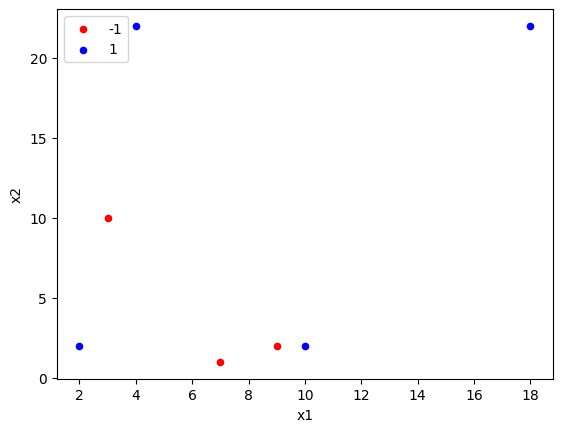

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

# Ορίζουμε τα δεδομένα και τις ετικέτες
am = 8722
sales_data = np.array([[2, am % 20],
                       [4, am % 25],
                       [10, am % 40],
                       [18, am % 50],
                       [3, am % 12],
                       [9, am % 20],
                       [7, am % 19]])

labels = np.array([1, 1, 1, 1, -1, -1, -1])

df = pd.DataFrame(dict(x1=sales_data[:, 0], x2=sales_data[:, 1], y=labels))

colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
# creating X and y values
X = df[['x1', 'x2']]
y = df['y']

svm = SVM(kernel="poly")

w, b, losses = svm.fit(X,y)

pred = svm.predict(X)

accuracy_score(pred, y)

SVM(kernel='poly')


0.5714285714285714

ValueError: ignored

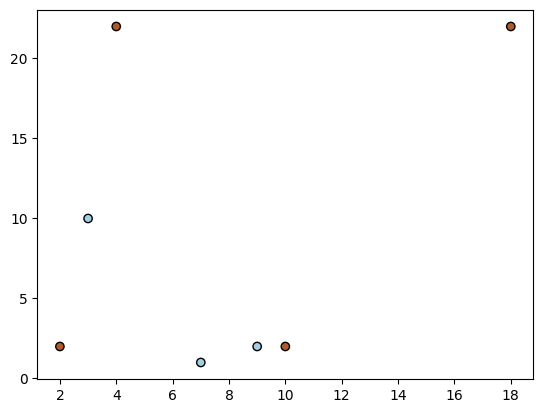

In [ ]:
# Scatter plot for input data points
plt.scatter(sales_data[:, 0], sales_data[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Actual Labels')

# Decision boundary
xx, yy = np.meshgrid(np.linspace(sales_data[:, 0].min(), sales_data[:, 0].max(), 50),
                     np.linspace(sales_data[:, 1].min(), sales_data[:, 1].max(), 50))

mesh_points = np.column_stack((xx.ravel(), yy.ravel()))
Z = svm.predict(mesh_points).reshape(xx.shape)  # Make sure your predict function returns the correct shape

# Contour plot for decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Εμφάνιση των διανυσμάτων υποστήριξης
# Note: Update this part based on how support_vectors are calculated in your SVM class
if len(svm.support_vectors) > 0:
    plt.scatter(svm.support_vectors[:, 0], svm.support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title('Polynomial SVM (from scratch)')
plt.xlabel('Sales (AM mod 20)')
plt.ylabel('Profit (AM mod 25)')

plt.legend()
plt.show()